#Librerias

In [1]:
!pip install datasets pillow

In [2]:
from datasets import load_dataset
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
import kagglehub

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# DATASET CAR & BIKE

In [7]:
path = kagglehub.dataset_download("utkarshsaxenadn/car-vs-bike-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/car-vs-bike-classification-dataset


# GENERADOR DE DATOS

In [8]:
dataset_path = "/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset"

In [9]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    class_mode="binary",
    subset="training",
    batch_size=32,
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    class_mode="binary",
    subset="validation",
    batch_size=32,
    shuffle=False
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# MODELO CNN

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ENTRENAMIENTO

In [14]:
history = model.fit(
    train_gen,
    epochs=2,
    validation_data=val_gen
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
 45/100 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5291 - loss: 0.8460 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6013 - loss: 0.7251 - val_accuracy: 0.8850 - val_loss: 0.2824
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9028 - loss: 0.2488 - val_accuracy: 0.9062 - val_loss: 0.2246


# Modelado

In [15]:
model.save("modelo_cnn_car_vs_bike.h5")

# METRICAS

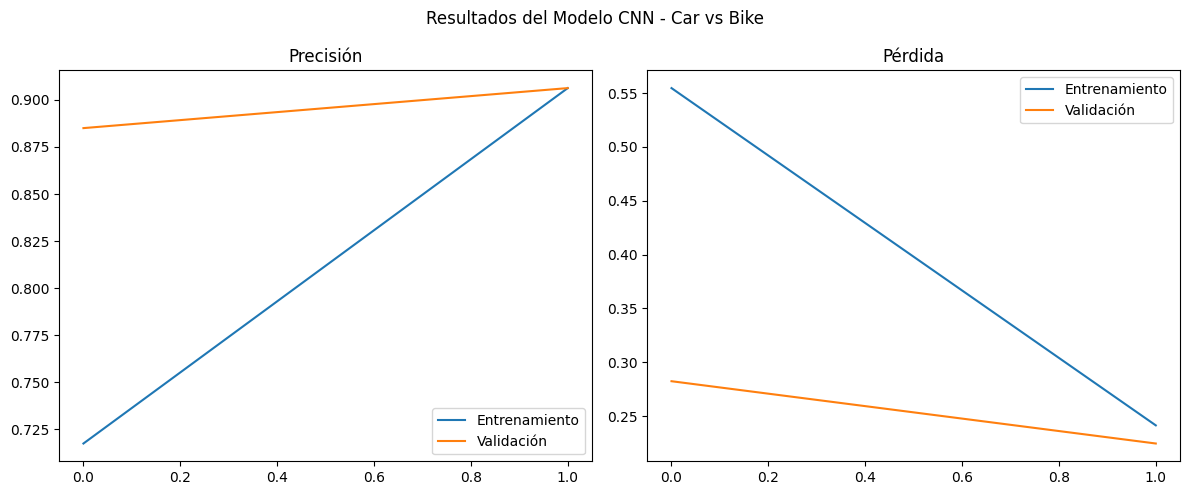

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Validación")
plt.title("Precisión")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Entrenamiento")
plt.plot(history.history['val_loss'], label="Validación")
plt.title("Pérdida")
plt.legend()

plt.suptitle("Resultados del Modelo CNN - Car vs Bike")
plt.tight_layout()
plt.show()

# ACTUACION DE LAS AMENAZAS

In [17]:
model = tf.keras.models.load_model("modelo_cnn_car_vs_bike.h5")

In [18]:
for img_batch, label_batch in val_gen:
    image = img_batch[0:1]  # Seleccionamos una sola imagen
    label = label_batch[0:1]
    break

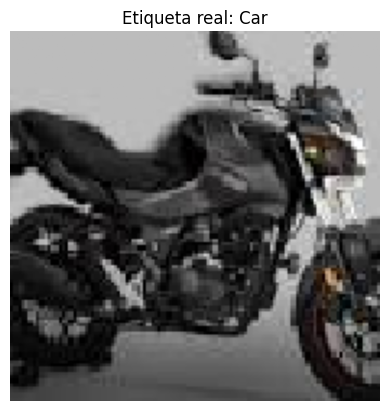

In [19]:
plt.imshow(image[0])
plt.title(f"Etiqueta real: {'Car' if label[0]==0 else 'Bike'}")
plt.axis('off')
plt.show()

In [20]:
def generar_perturbacion(modelo, imagen, etiqueta_real, epsilon=0.01):
    imagen_tensor = tf.convert_to_tensor(imagen)
    etiqueta_tensor = tf.convert_to_tensor([[etiqueta_real]])  # <- cambio aquí

    with tf.GradientTape() as tape:
        tape.watch(imagen_tensor)
        pred = modelo(imagen_tensor)
        loss = tf.keras.losses.binary_crossentropy(etiqueta_tensor, pred)

    grad = tape.gradient(loss, imagen_tensor)
    perturbacion = epsilon * tf.sign(grad)
    imagen_adversarial = imagen_tensor + perturbacion
    imagen_adversarial = tf.clip_by_value(imagen_adversarial, 0, 1)
    return imagen_adversarial


In [21]:
perturbada = generar_perturbacion(model, image, label[0], epsilon=0.50)


In [22]:
pred_original = model.predict(image)[0][0]
pred_perturbada = model.predict(perturbada)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


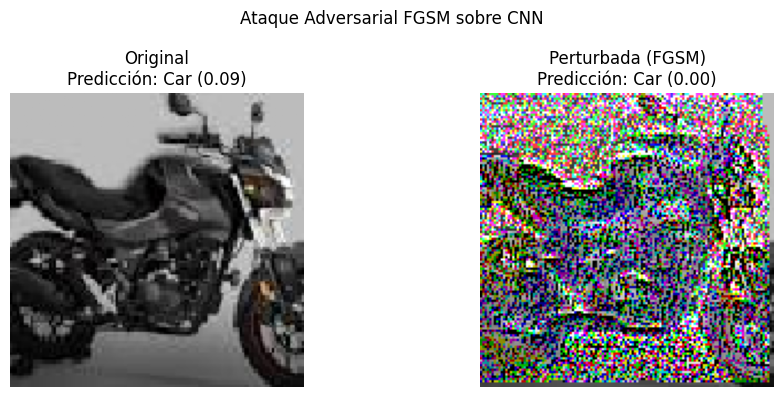

In [23]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.title(f"Original\nPredicción: {'Bike' if pred_original > 0.5 else 'Car'} ({pred_original:.2f})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(perturbada[0])
plt.title(f"Perturbada (FGSM)\nPredicción: {'Bike' if pred_perturbada > 0.5 else 'Car'} ({pred_perturbada:.2f})")
plt.axis('off')

plt.suptitle("Ataque Adversarial FGSM sobre CNN")
plt.tight_layout()

# GUARDAR la imagen como archivo
plt.savefig("comparacion_fgsm.png")
plt.show()
